# Non Linear Regression

### Importing Modules

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

### Reading Data

Shape of data:  (100, 2)


,y,x
0,-0.092155,-1.368186
1,0.704033,0.235943
2,1.424685,1.018225
3,-0.792711,-1.297050


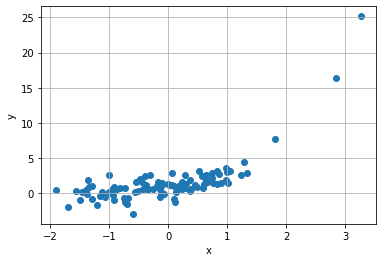

In [2]:
df = pd.read_csv('non_linear_data.csv')
print('Shape of data: ', df.shape)
display(df.head(4))
plt.scatter(df.x, df.y)
plt.xlabel('x'), plt.ylabel('y')
plt.grid()
plt.show()

### Model

\begin{align}
\large
y_i & = {\rm e}^{\theta x_i} + \sigma\epsilon_i, \hspace{10 mm} i = 1, 2,..., 100. \\
\end{align}

1. Use a Newton-Raphson algorithm to find the least squares estimator, $\hat\theta$, for $\theta$
(take the initial value $\theta_0$ = 1).

*Newton-Raphson*

\begin{equation}
x = x_0 - \frac{f (x_0)}{f'(x_0)}.
\end{equation}

### Least Squares Estimator

*Newton-Raphson Set-up for Least Squares*

\begin{align}
\large
y_i & = {\rm e}^{\theta x_i} \\
\\
\text{Sum of Square Errors: } \\
\\
I(\theta) & = \frac{1}{2} \Sigma_{i=1}^{n}(y_i - m(\theta, x_i))^{2}
\\
\\
I'(\theta) &= - \Sigma_{i=1}^{n}(y_i - m(\theta, x_i)m'(\theta, x_i) 
\\ 
m(\theta, x_i) &= {\rm e}^{\theta x_i} 
\\
m'(\theta, x_i) &= \frac{\partial m}{\partial \theta} = x {\rm e}^{\theta x_i} 
\\
I'(\theta) &= - \Sigma_{i=1}^{n}(y_i - {\rm e}^{\theta x_i}) x {\rm e}^{\theta x_i}
\\
\\
m''(\theta, x_i) &= \frac{\partial^2 m}{\partial \theta^2} = x^2 {\rm e}^{\theta x_i}
\\
I''(\theta) &= \Sigma_{i=1}^{n}x^2 {\rm e}^{\theta x_i} (2 {\rm e}^{\theta x_i} - y)
\\
\\
L (\theta) &= I'(\theta)
\\
\theta_{t+1} &= \theta_{t} - \frac{L(x_0)}{L'(x_0)} = \theta_{t} - \frac{I'(x_0)}{I''(x_0)}
\\
\end{align}

In [3]:
def newton(x, y, guess, tolerance = 0.00001, output_message = False):
    """
    Args:
        guess (float): initial value for parameter
        tolerance (float): tolerance
    
    \begin{equation}
    t = t_0 - \frac{f(x_0)}{f'(x_0)}.
    \end{equation}

    """
    #Initialize
    t_0 = guess
    difference = tolerance * 5 # Enter Loop
    iter_number = 0

    status_message = 'Starting with Guess = ' + str(t_0) + '\n'
    while abs(difference) > tolerance:
        
        # calculate values of function and derivative and t+1 value
        
        f = np.sum(-x*np.exp(t_0*x)*(y - np.exp(t_0*x)))                
        f_prime = np.sum((x**2)*np.exp(t_0*x)*(2*np.exp(t_0*x) -y))
        t = t_0 - (f / f_prime)

        # calculate difference and update iteration state
        difference = t - t_0
        t_0 = t
        iter_number += 1
        status_message += 'Iteration #' + str(iter_number) + ':= ' + str(t) + '\n'
        
    status_message += 'Total No. of Iterations = '  +  str(iter_number)
    
    if output_message:
        return t_0, status_message
    return t_0    

In [4]:
theta_hat, message = newton(df.x, df.y, 
                            guess = 1, 
                            output_message = True)
print(message)
print('Theta_hat =', theta_hat)

Starting with Guess = 1
Iteration #1:= 0.9906754421932568
Iteration #2:= 0.9902524564644658
Iteration #3:= 0.9902516224836764
Total No. of Iterations = 3
Theta_hat = 0.9902516224836764


2. Estimated value of $\hat\theta$, <br>
$\hspace{30mm}\hat\theta$ = 0.9902516

Shape of data:  (100, 2)


,y,x
0,-0.092155,-1.368186
1,0.704033,0.235943
2,1.424685,1.018225
3,-0.792711,-1.297050


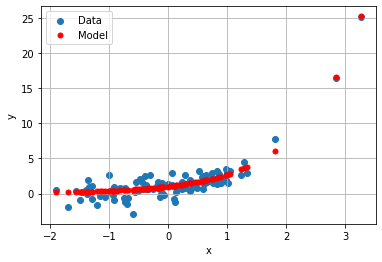

In [5]:
theta_hat = newton(df.x, df.y, guess = 1)
df = pd.read_csv('non_linear_data.csv')
print('Shape of data: ', df.shape)
display(df.head(4))
plt.scatter(df.x, df.y, label='Data')
plt.plot(df.x, np.exp(theta_hat * df.x), '.r', markersize = 10, label='Model')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Variance of Estimator with Parametric Bootstrap

3. Use the parametric Bootstrap to find an approximate variance for $\hat\theta$.

In [6]:
#Step 1: Get variance
n = len(df)
var_xy = (1/(n-1) * np.sum( (df.y-np.exp(theta_hat * df.x) )**2))
print('Variance using best estimate for theta:', var_xy)

Variance using best estimate for theta: 1.0103637690419425


In [7]:
# Model function
m = lambda x: math.exp(theta_hat*x) 

theta_i = []
for _ in range(1000):
    
    # Obtain a bootstrap sample from the density f(y | theta_hat)
    y_i = []
    for xi in df.x.values:        
        mean = m(theta_hat*xi) 
        y_iter = np.random.normal(mean, var_xy)
        y_i.append(y_iter)
        
    theta_iter = newton(df.x, y_i, 1, tolerance = 0.00001)
    theta_i.append(theta_iter)

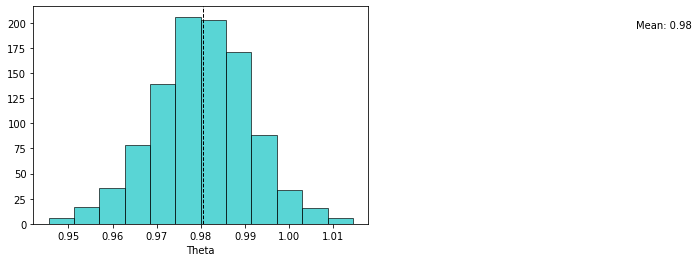

In [8]:
def plot_hist(x, name):
    plt.hist(x, bins=12, color='c', edgecolor='k', alpha=0.65)
    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
    plt.xlabel(name)
    plt.show()
plot_hist(np.array(theta_i), 'Theta')

In [9]:
var_theta_hat = np.array(theta_i).var(ddof = 1)
var_theta_hat

0.00012043212628189552

4. Estimated value of $Var(\hat\theta)$, <br>
$\hspace{30mm}Var(\hat\theta)$ = 0.0001204

### Variance of Estimator with Non-Parametric Bootstrap

3. Use the non-parametric Bootstrap to find an approximate variance for $\hat\theta$.

In [21]:
theta_i = []
for _ in range(1000):
    
    # Sample with replacement 100 (x,y) pairs
    idx = np.random.choice(len(df.x), size=100, replace=True)
    x_arr = df.x[idx]
    y_arr = df.y[idx]    
    
    theta_iter = newton(x_arr, y_arr, 1, tolerance = 0.00001)
    theta_i.append(theta_iter)

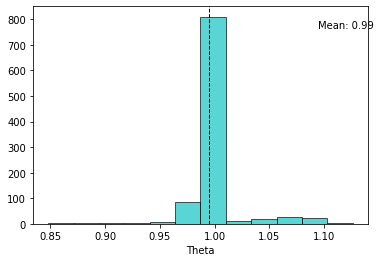

In [22]:
def plot_hist(x, name):
    plt.hist(x, bins=12, color='c', edgecolor='k', alpha=0.65)
    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
    plt.xlabel(name)
    plt.show()
plot_hist(np.array(theta_i), 'Theta')

In [25]:
var_theta_hat = np.array(theta_i).var(ddof = 1)
var_theta_hat

0.0006971837168005572

4. Estimated value of $Var(\hat\theta)$, <br>
$\hspace{30mm}Var(\hat\theta)$ = 0.000697

5. The logarithm of the predicted value at $x = \bar x$ is given by <br>
$\hspace{50mm}log\hat y = \hat\theta \bar x$

Find a 95% confidence interval for the predicted value of $log y$.

Recall Best Estimate for $\hat\theta$

In [13]:
theta_hat

0.9902516224836764

In [14]:
df.x.values.mean()

-0.08488403633000001

In [15]:
x_bar = df.x.values.mean()
print('x_bar: ', x_bar)
log_y_hat = x_bar * theta_hat
print('log_y_hat: ', log_y_hat)

x_bar:  -0.08488403633000001
log_y_hat:  -0.08405655469874584


In [16]:
CI_error = 1.96 * np.std( np.array(theta_i)*x_bar , ddof = 1)
CI_error

0.0050657770492117905

In [17]:
CI_error = abs(1.96 * math.sqrt(var_theta_hat)*x_bar)
CI_error

0.0050657770492117905

In [18]:
log_y_hat_UP = log_y_hat + CI_error
log_y_hat_DO = log_y_hat - CI_error

print('95% Confidence Interval: ', log_y_hat_DO , 'to', log_y_hat_UP)

95% Confidence Interval:  -0.08912233174795764 to -0.07899077764953405
